# StableMotif tutorial 

description

In [19]:
import StableMotifs as sm
import PyBoolNet
import StableMotifs.Export as ex

## Read in a Boolean model:

In [2]:
rules='''A*=B
B*=A
C*=A or not D
D*=C
E*=B and F
F*=E'''


In [3]:
#format the rules to be PyBoolNet compatible 
rules_pbn = sm.Format.booleannet2bnet(rules)
primes = PyBoolNet.FileExchange.bnet2primes(rules_pbn)
sm.Format.pretty_print_prime_rules({k:primes[k] for k in sorted(primes)})


A* = B
B* = A
C* = !D | A
D* = C
E* = B & F
F* = E


## Generating the Attractor repertoire

In [4]:
#explanation of the parameter
max_simulate_size=20

In [5]:
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)

### What do we know about the attractors?

In [6]:
#Summary of the attractors:
ar.summary()

There are 3 attractors.
{'A': 0, 'B': 0, 'C': 'X', 'D': 'X', 'E': 0, 'F': 0}

{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1}

{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 0, 'F': 0}



If we want the attractors in a DataFrame:

In [7]:
df=ex.attractor_dataframe(ar)
df

,A,B,C,D,E,F
0,0,0,X,X,0,0
1,1,1,1,1,1,1
2,1,1,1,1,0,0


To access the attractors as the dictionaries:

In [8]:
for a in ar.attractors:
    print(a.attractor_dict)

{'A': 0, 'B': 0, 'C': 'X', 'D': 'X', 'E': 0, 'F': 0}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 0, 'F': 0}


## Generating and plotting the Suuccession Diagrams

If we want to add the attractors as nodes of the succession diagram connected to the terminal nodes of the succession diagram we set:


In [9]:
include_attractors_in_diagram=True

### Reduced network based succession diagram

In [10]:
GR=ex.networkx_succession_diagram_reduced_network_based(ar,include_attractors_in_diagram=include_attractors_in_diagram)

In [11]:
for n in GR.nodes(data=True):
    print(n)

(0, {'label': '', 'node_states': []})
(1, {'label': '{A: 0, B: 0}', 'node_states': [{'A': 0, 'B': 0}]})
(2, {'label': '{A: 1, B: 1}', 'node_states': [{'A': 1, 'B': 1}]})
(3, {'label': '{A: 1, B: 1}, {E: 1, F: 1}', 'node_states': [{'A': 1, 'B': 1}, {'E': 1, 'F': 1}]})
(4, {'label': '{A: 1, B: 1}, {E: 0, F: 0}', 'node_states': [{'A': 1, 'B': 1}, {'E': 0, 'F': 0}]})
(5, {'label': '{E: 0, F: 0}', 'node_states': [{'E': 0, 'F': 0}]})
(6, {'label': '{E: 0, F: 0}, {A: 0, B: 0}', 'node_states': [{'E': 0, 'F': 0}, {'A': 0, 'B': 0}]})
('A0', {'label': '{A: 0, B: 0, C: X, D: X, E: 0, F: 0}', 'node_states': {'A': 0, 'B': 0, 'C': 'X', 'D': 'X', 'E': 0, 'F': 0}})
('A1', {'label': '{A: 1, B: 1, C: 1, D: 1, E: 1, F: 1}', 'node_states': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1}})
('A2', {'label': '{A: 1, B: 1, C: 1, D: 1, E: 0, F: 0}', 'node_states': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 0, 'F': 0}})


We can plot the succession diagram using matplotlib and networkx. The following parameters can be adjusted:
* __G__ -- (networkx DiGraph) of the succession diagram <br>
* __fig_dimensions__ -- ((float, float)) the width/height dimensions in inches of the figure. By default it's propotional to the number of nodes in the succession diagram <br>
* __pos__ (dict) -- the layout of dictionary of nodes (key) and coordinate tuples (value). By default the "pydot" hierarchical layout is generated by the function
* __detailed_labels__ -- (bool) -- if True (default) the plot will show the corresponding node states to each succession node and attractor. If False the labels are generated based on the motif reduction unique IDs. In this case the attractors are marked with an "A" prefix. 
* __node_size__= (int or list of ints) -- if int, all nodes are of the same size (nr of pixels), if iterable, the nodes in the corresponding order (as returned by G.nodes()) will be sized accordingly. The number of ints in the list has to be equal to the number of nodes. Default is 50* the number of nodes 
* __node_color__ -- (str or list of str) default='grey'. Same system as node_size, all colors codes compatible with matplotlib work.
* __font_size__= (int) default=12
* __font_color__=(str or list of str) default='black'. Same system as node_size, all colors codes compatible with matplotlib work.

In [12]:
#pos= nx.layout.kamada_kawai_layout(GR)

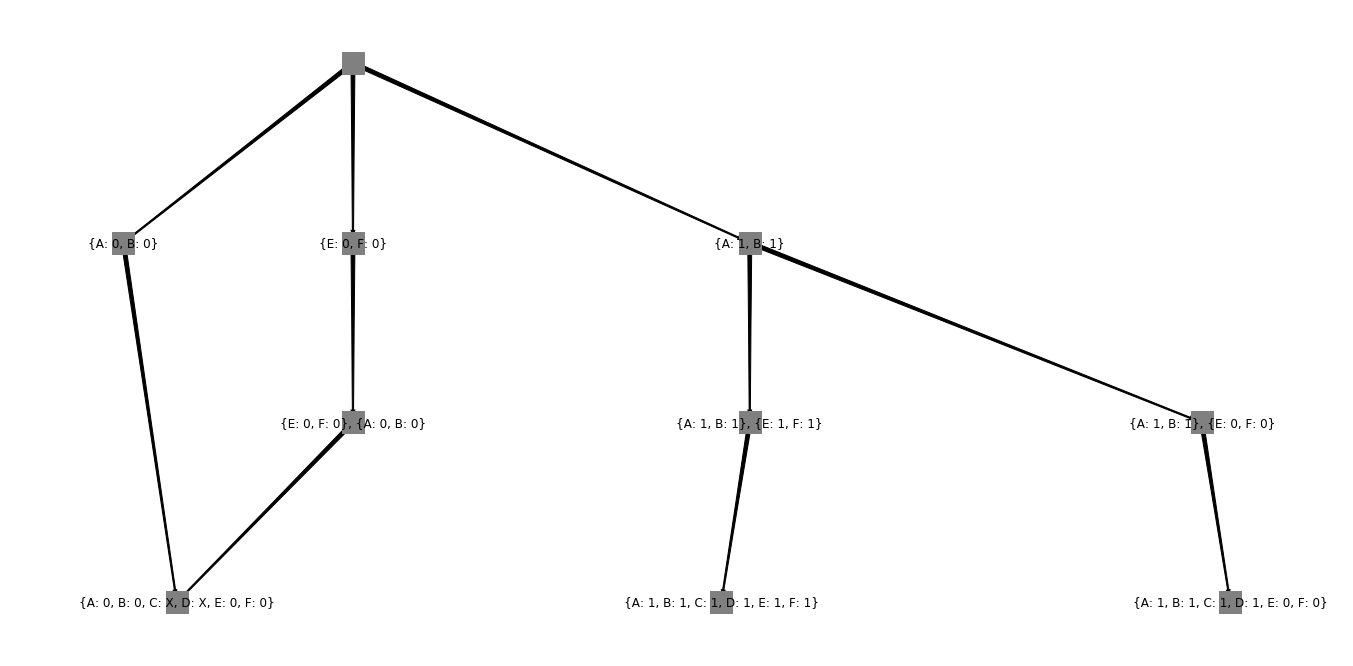

In [13]:
ex.plot_nx_succession_diagram(GR)

### Motif based succession diagram

In [14]:
GM=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)

In [15]:
for n in GM.nodes(data=True):
    print(n)

((0, 1), {'label': '{B: 0, A: 0}', 'node_states': {'B': 0, 'A': 0}})
((0, 2), {'label': '{B: 1, A: 1}', 'node_states': {'B': 1, 'A': 1}})
((2, 3), {'label': '{F: 1, E: 1}', 'node_states': {'F': 1, 'E': 1}})
((2, 4), {'label': '{F: 0, E: 0}', 'node_states': {'F': 0, 'E': 0}})
((0, 5), {'label': '{F: 0, E: 0}', 'node_states': {'F': 0, 'E': 0}})
((5, 6), {'label': '{B: 0, A: 0}', 'node_states': {'B': 0, 'A': 0}})
('A0', {'label': '{A: 0, B: 0, C: X, D: X, E: 0, F: 0}', 'node_states': {'A': 0, 'B': 0, 'C': 'X', 'D': 'X', 'E': 0, 'F': 0}})
('A1', {'label': '{A: 1, B: 1, C: 1, D: 1, E: 1, F: 1}', 'node_states': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1}})
('A2', {'label': '{A: 1, B: 1, C: 1, D: 1, E: 0, F: 0}', 'node_states': {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 0, 'F': 0}})


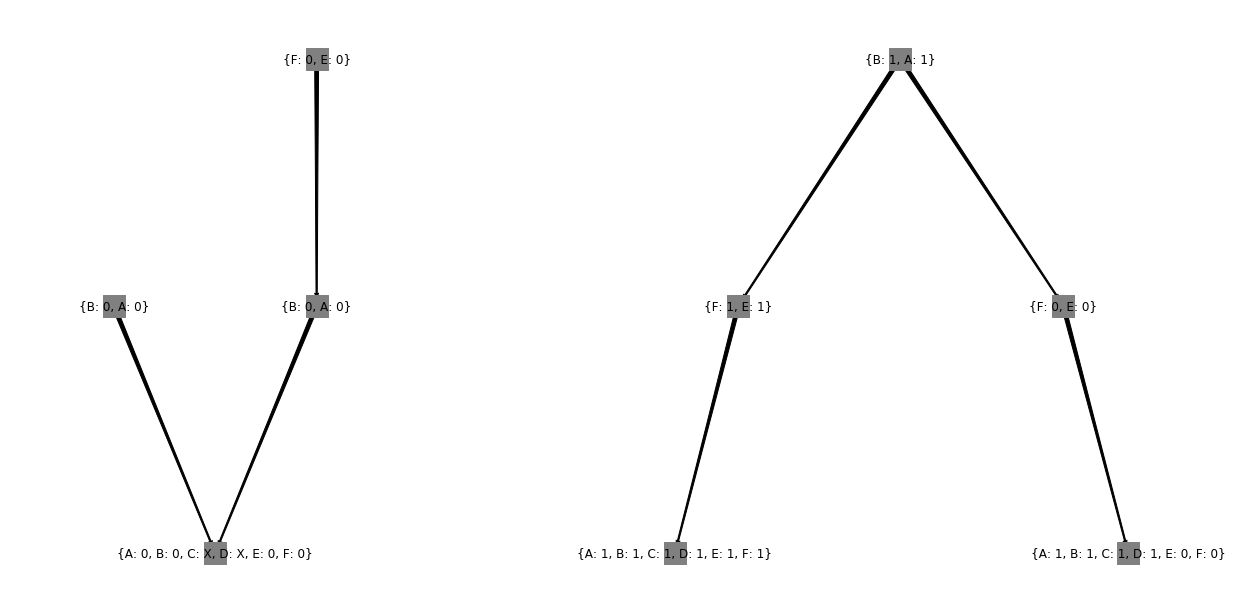

In [16]:
ex.plot_nx_succession_diagram(GM)

In case we only need the set of unique stable motifs:

In [17]:
ex.get_motif_set(ar)

[{'B': 1, 'A': 1}, {'F': 0, 'E': 0}, {'B': 0, 'A': 0}, {'F': 1, 'E': 1}]

## Plotting with yED

Plotting the succession diagrams in matplolib is an quick and efficient way of having a glimpse at the succession diagram, however in the case of large and more complex diagrams this can become inefficient. We suggest exporting the diagrams and plotting them with tools such as yED. Here we explain how to do it:
* first, we export the succession diagram into graphml format. The attributes such as the label are preserved by the format

In [18]:
ex.save_to_graphml(GR,model_name='succ_diagram_example')

* next, open the saved graphml in yED
* go to Edit -> Properties Mapper
* (optional) in the top left corner of the pop-up window click *import additional configuration* and select the *succession_diagram_yED_properties.cnfx* config file from GitHub. 
* Set up the configuration and click *Apply*
* Finally, we suggest a hierarchical layout. To get this go to Layout -> Hierarchical